In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

df = pd.read_csv("C:\\Users\\mathi\\Downloads\\indianEco.csv")


In [9]:
print(df.head())

   Year Country Name  GDP (current US$)    GDP per capita (current US$)   \
0  1960        India        3.702988e+10                              82   
1  1961        India        3.923244e+10                              85   
2  1962        India        4.216148e+10                              90   
3  1963        India        4.842192e+10                             101   
4  1964        India        5.648029e+10                             116   

   GDP growth (annual %)  Imports of goods and services (% of GDP)  \
0                   0.00                                      6.83   
1                   3.72                                      5.96   
2                   2.93                                      6.03   
3                   5.99                                      5.91   
4                   7.45                                      5.69   

   Exports of goods and services (% of GDP)  \
0                                      4.46   
1                           

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Year                                           61 non-null     int64  
 1   Country Name                                   61 non-null     object 
 2   GDP (current US$)                              61 non-null     float64
 3    GDP per capita (current US$)                  61 non-null     int64  
 4   GDP growth (annual %)                          61 non-null     float64
 5   Imports of goods and services (% of GDP)       61 non-null     float64
 6   Exports of goods and services (% of GDP)       61 non-null     float64
 7    Total reserves (includes gold, current US$)   61 non-null     float64
 8   Inflation, consumer prices (annual %)          61 non-null     float64
 9   Population, total                              61 non-nu

In [11]:
# Descriptive statistics
descriptive_stats = df.describe()
print(descriptive_stats)

              Year  GDP (current US$)    GDP per capita (current US$)   \
count    61.000000        6.100000e+01                       61.000000   
mean   1990.000000        6.584725e+11                      575.557377   
std      17.752934        8.129606e+11                      584.079062   
min    1960.000000        3.702988e+10                       82.000000   
25%    1975.000000        9.952590e+10                      161.000000   
50%    1990.000000        2.882084e+11                      340.000000   
75%    2005.000000        8.203816e+11                      715.000000   
max    2020.000000        2.831552e+12                     2101.000000   

       GDP growth (annual %)  Imports of goods and services (% of GDP)  \
count              61.000000                                 61.000000   
mean                4.938197                                 12.746393   
std                 3.344891                                  8.155110   
min                -7.250000         

In [12]:
# Remove repeated values in the "Country Name" column
df['Country Name'] = df['Country Name'].unique()[0]

In [13]:
# Remove leading/trailing whitespaces from column names
df.columns = df.columns.str.strip()

In [14]:
# Convert relevant columns to numeric, handling errors by coercing them to NaN
numeric_columns = ['GDP (current US$)', 'GDP per capita (current US$)', 'GDP growth (annual %)',
                    'Imports of goods and services (% of GDP)', 'Exports of goods and services (% of GDP)',
                    'Total reserves (includes gold, current US$)', 'Inflation, consumer prices (annual %)',
                    'Population, total', 'Population growth (annual %)', 'Life expectancy at birth, total (years)']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [24]:
from statistics import mode

mode_values = df.apply(mode)
print("\nMode Values:")
print(mode_values)



Mode Values:
Year                                                    1960
Country Name                                           India
GDP (current US$)                              37029883876.0
GDP per capita (current US$)                              90
GDP growth (annual %)                                   7.86
Imports of goods and services (% of GDP)                6.83
Exports of goods and services (% of GDP)                4.03
Total reserves (includes gold, current US$)      674536630.9
Inflation, consumer prices (annual %)                   1.78
Population, total                                  445954579
Population growth (annual %)                            2.23
Life expectancy at birth, total (years)                41.13
dtype: object


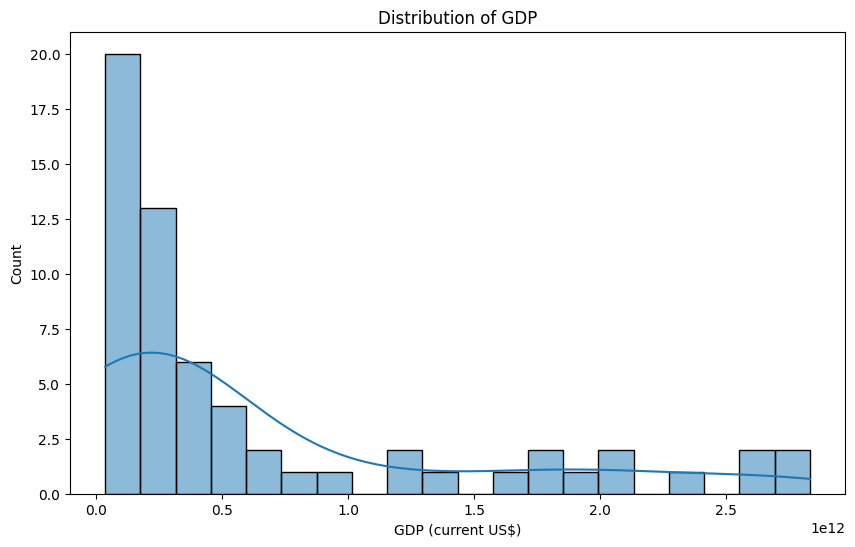

In [25]:
# Exploratory Data Analysis (EDA)

# Distribution of GDP
plt.figure(figsize=(10, 6))
sns.histplot(df['GDP (current US$)'], bins=20, kde=True)
plt.title('Distribution of GDP')
plt.xlabel('GDP (current US$)')
plt.show()

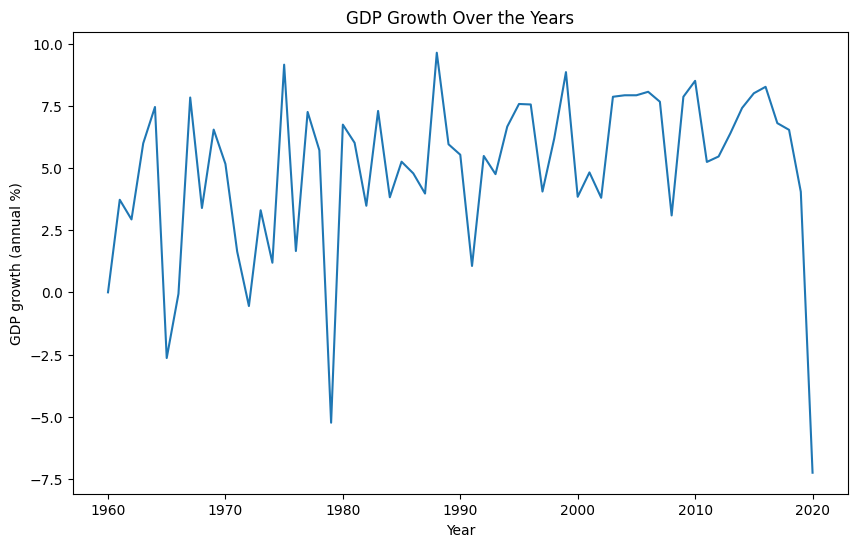

In [26]:
# GDP Growth over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='GDP growth (annual %)', data=df)
plt.title('GDP Growth Over the Years')
plt.xlabel('Year')
plt.ylabel('GDP growth (annual %)')
plt.show()

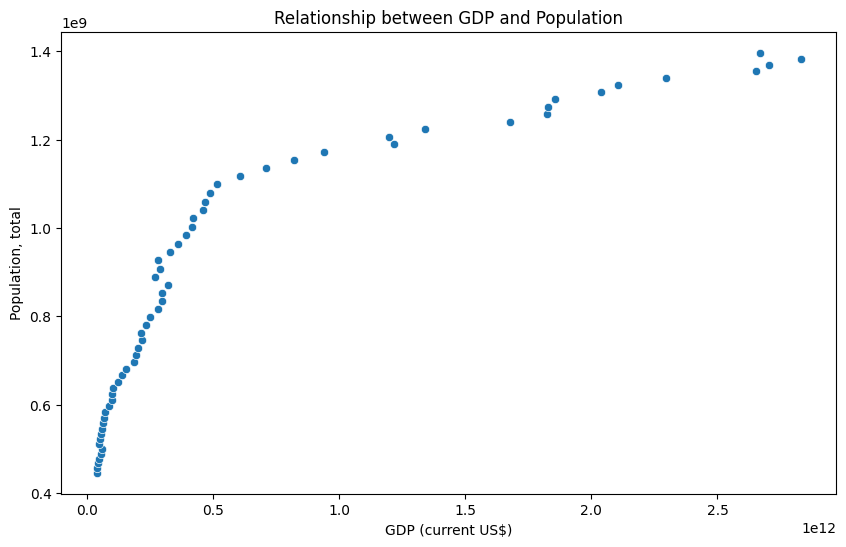

In [27]:
# Relationship between GDP and Population
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP (current US$)', y='Population, total', data=df)
plt.title('Relationship between GDP and Population')
plt.xlabel('GDP (current US$)')
plt.ylabel('Population, total')
plt.show()

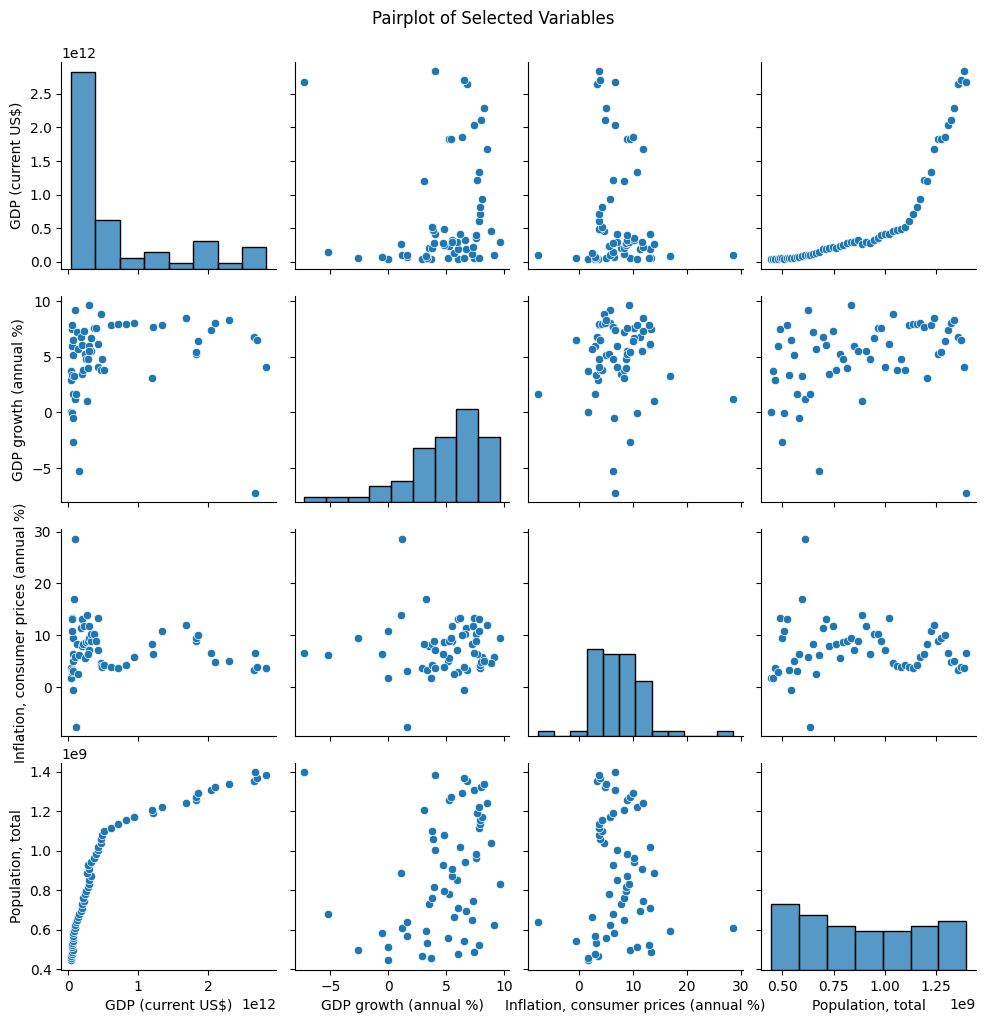

In [28]:
# Pairplot for selected variables
selected_columns = ['GDP (current US$)', 'GDP growth (annual %)', 'Inflation, consumer prices (annual %)', 'Population, total']
sns.pairplot(df[selected_columns])
plt.suptitle('Pairplot of Selected Variables', y=1.02)
plt.show()

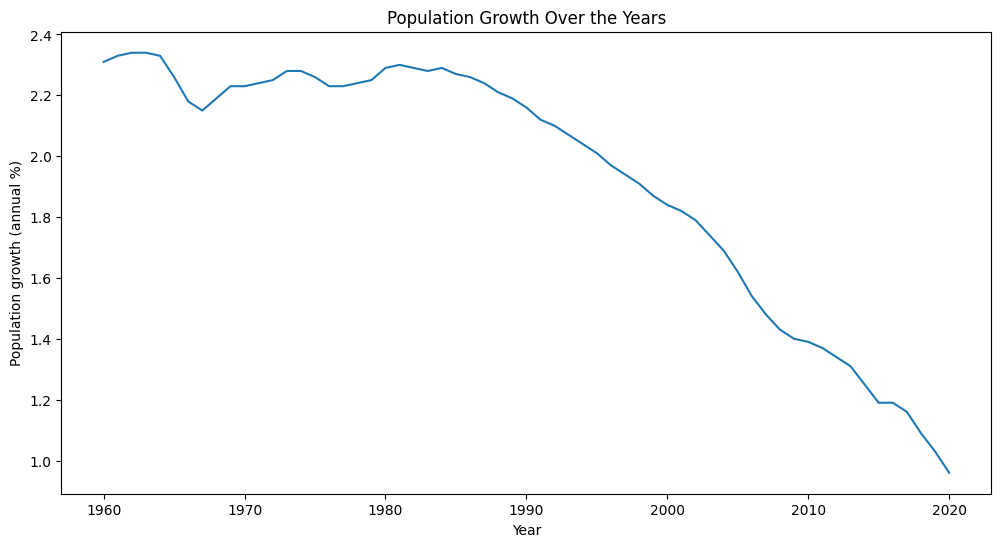

In [30]:
# Visualize Population growth over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Population growth (annual %)', data=df)
plt.title('Population Growth Over the Years')
plt.show()

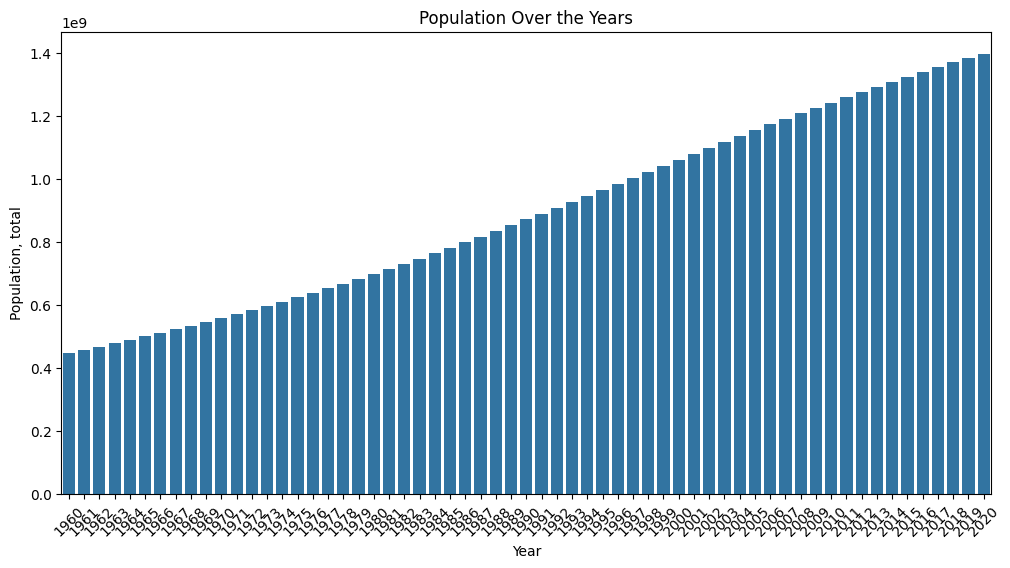

In [32]:
# Bar chart for Population over the years
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Population, total', data=df)
plt.title('Population Over the Years')
plt.xlabel('Year')
plt.ylabel('Population, total')
plt.xticks(rotation=45)
plt.show()